<a href="https://colab.research.google.com/github/3142akay/churn_prediction.ipynb/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import pickle

data loading

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df = df.drop(columns = ["customerID"]) # not necessary

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
  if col not in numerical_columns:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:
len(df[df["TotalCharges"]==" "])

11

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"})

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# checking the class distribution
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**EDA**

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


*   Numerical Feature Analysis
    understanding the distribution of numerical features

In [ ]:
def plot_historam(df,column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")
  #calc the mean and median
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  #add verticla line for mean and meadian
  plt.axvline(col_mean, color = "red", linestyle="--",label = "Mean")
  plt.axvline(col_median, color = "green", linestyle="-",label = "Median")

  plt.legend()
  plt.show()

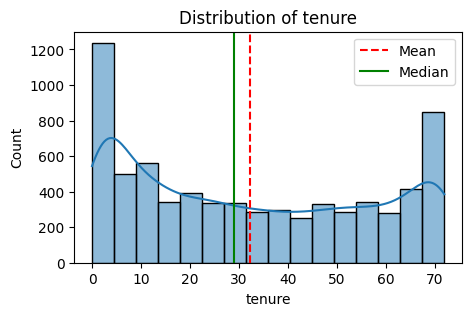

In [ ]:
plot_historam(df,"tenure")

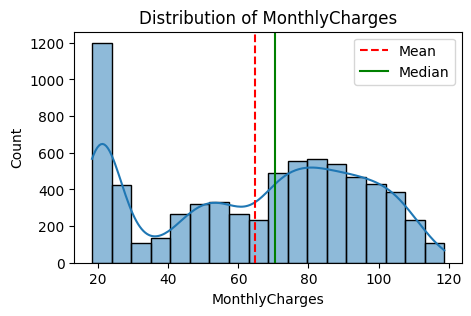

In [ ]:
plot_historam(df,"MonthlyCharges")

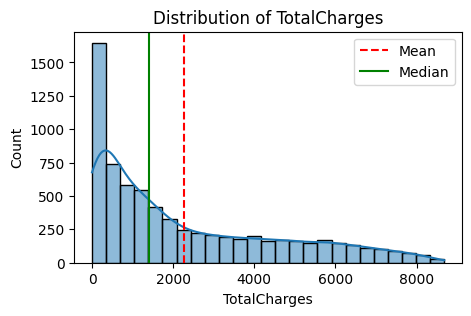

In [ ]:
plot_historam(df,"TotalCharges")

**Box plot for Numerical feature to get outliers**

In [ ]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"BoxPlot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

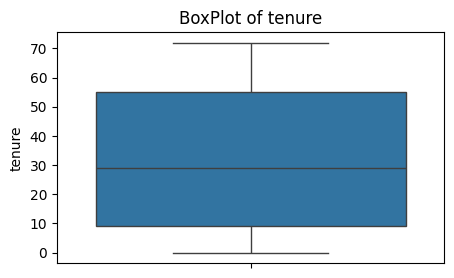

In [ ]:
plot_boxplot(df,"tenure")

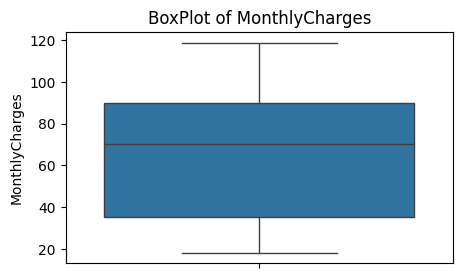

In [ ]:
plot_boxplot(df,"MonthlyCharges")

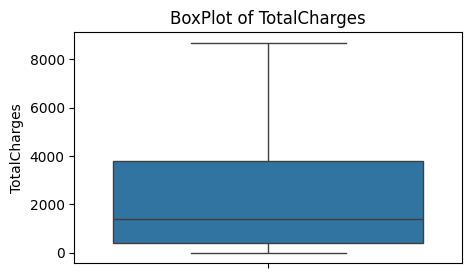

In [ ]:
plot_boxplot(df,"TotalCharges")

correlation matrix - heatmap fofr numerical columns

<Axes: >

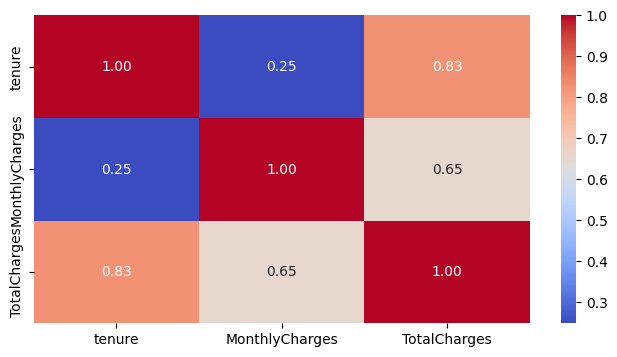

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True,cmap="coolwarm",fmt=".2f")

Categorical Features Analsis

countplot for categorical featrues

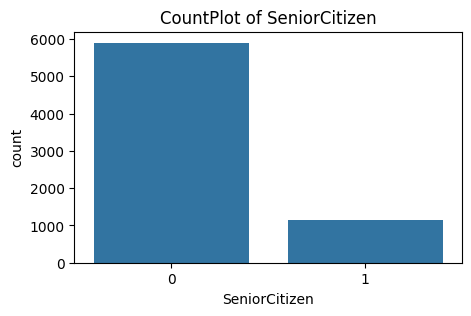

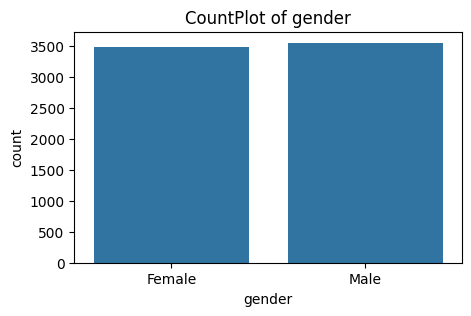

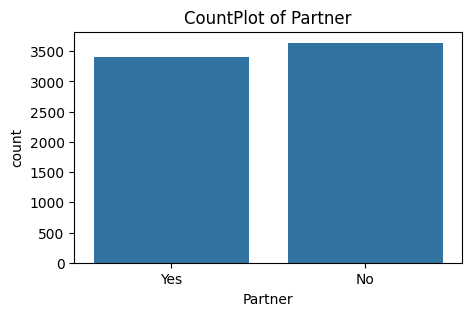

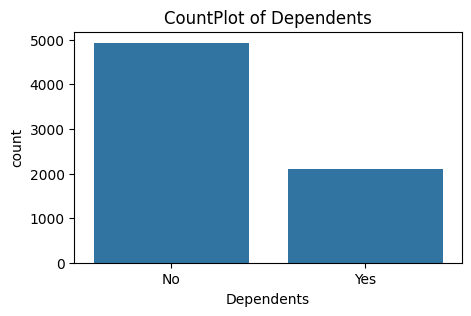

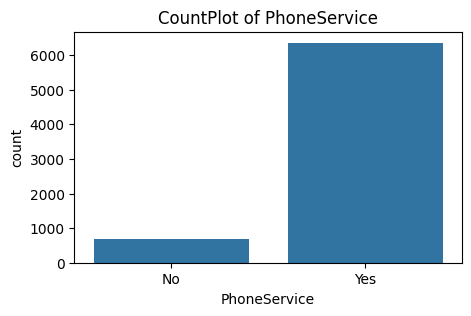

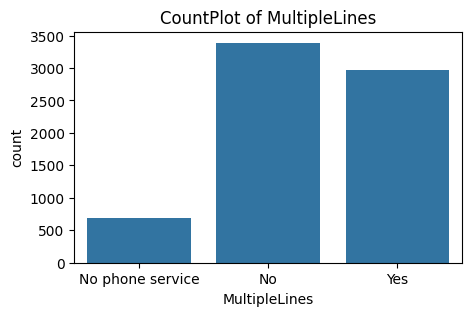

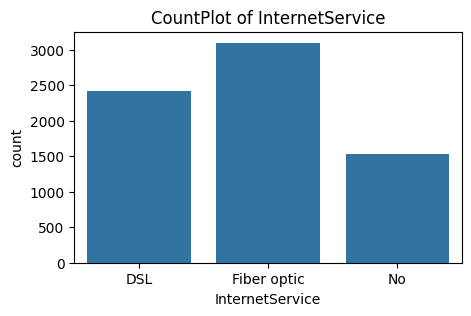

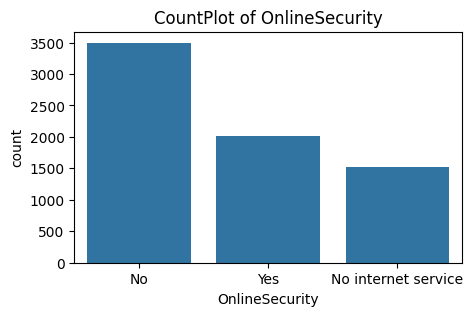

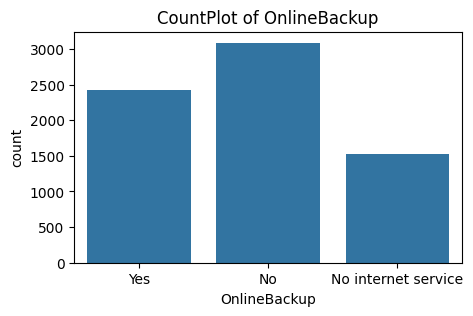

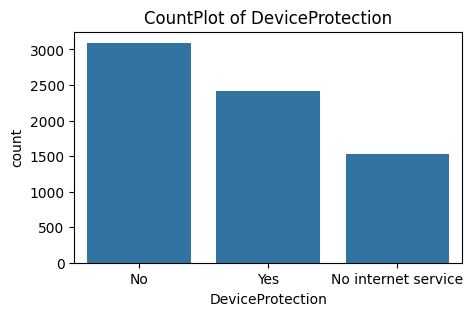

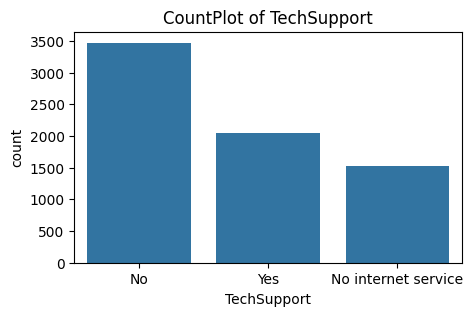

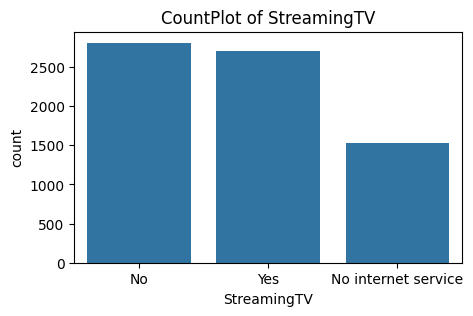

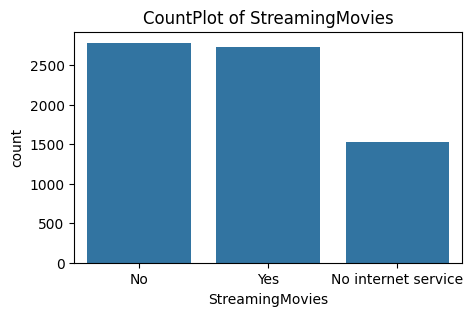

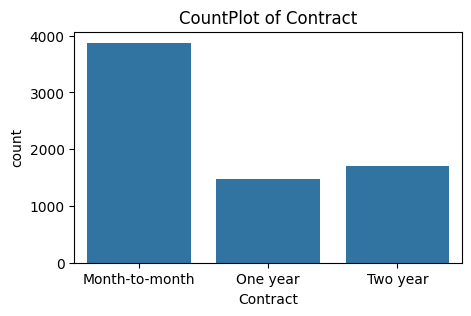

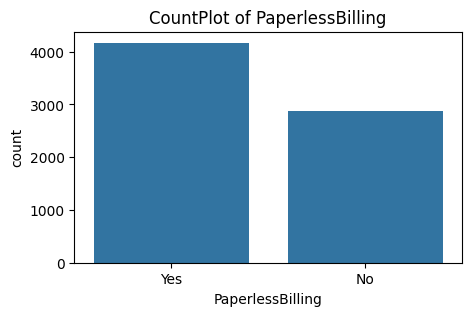

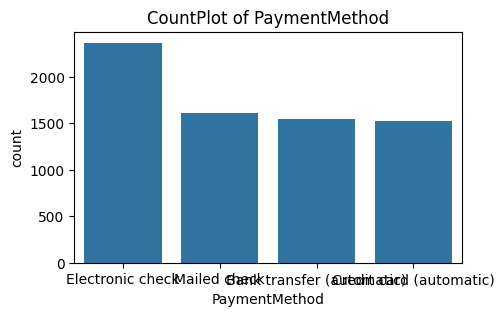

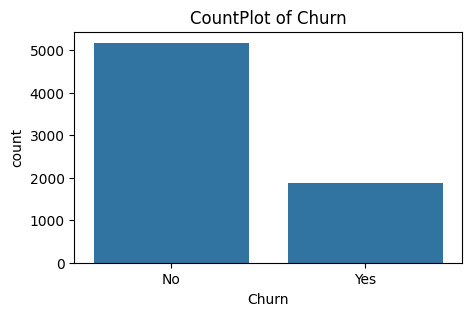

In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"CountPlot of {col}")
  plt.show()

**Data Preprocessing**

In [ ]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

/tmp/ipython-input-26-3368294369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [ ]:
# identifying colmuns with object data type
object_columns = df.select_dtypes(include="object").columns.to_list()


In [ ]:
print(object_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
#initialize a dictonary to save the encoders
encoders = {}

#apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

#save the encoders in a pickle fulr
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


splitting into training and testing

In [ ]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [ ]:
print(y.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


synthetix minority oversampling technique

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


Model Training

In [ ]:
#dictonaries of model
model = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
cv_scores = {}
#perform 5 fold cross validation for each model
for model_name ,model in model.items():
  print(f"training {model_name} with default parameters")
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring = "accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*60)

training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
------------------------------------------------------------
training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
------------------------------------------------------------
training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
------------------------------------------------------------


random forest has highest accuracy with default params

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

**model evaluation**

In [ ]:
# evaluate on test data
y_test_pred = model.predict(X_test)

print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification report:\n",classification_report(y_test,y_test_pred))

Accuracy score:
 0.7806955287437899
Confusion matrix:
 [[885 151]
 [158 215]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
#save the trained model as a pickle  file
model_data = {"model": rfc, "features_names": X.columns.to_list()}

with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)

load the saved model to build predictive system

In [ ]:
with open("customer_churn_model.pkl","rb") as f:
  model_data = pickle.load(f)
  loaded_model = model_data["model"]
  features_names  = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85

}

input_data_df = pd.DataFrame([input_data])
with open("encoders.pkl","rb") as f:
  encoders = pickle.load(f)

#encode categorical featrues using saved encoders
for column,encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

#make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

#results
if prediction[0] == 1:
  print("Customer is likely to churn")
else:
  print("Customer is likely to stay")
print(f"Predicition probability: {pred_prob}")

[0]
Customer is likely to stay
Predicition probability: [[0.78 0.22]]
